# Segmentation  Notebook

## Using trained caffe neural nets

Start by choosing which model to use

In [4]:
from pylab import *
%matplotlib inline

# this file should be run from {caffe_root}/examples (otherwise change this line)
caffe_root = '/Users/Jeremy/Documents/Connectomics/caffe/' 

import sys
sys.path.insert(0, caffe_root + 'python')
import caffe

proto_path = '/Users/Jeremy/Documents/Connectomics/trained_neural_nets/deploy_membrane_color.prototxt'
model_path = '/Users/Jeremy/Documents/Connectomics/trained_neural_nets/membrane_color_iter_90.caffemodel'

Next we prepare the data:

In [5]:
from tifffile import imread

img_path = '/Users/Jeremy/Desktop/training_stack.tif'
gt_path = '/Users/Jeremy/Desktop/training_stack_gt.tif'

img_data = imread(img_path)
gt_data = imread(gt_path)

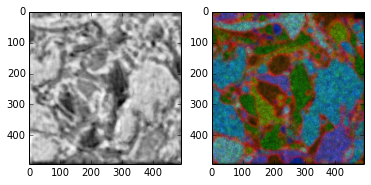

In [6]:
import caffe
#load the model
net = caffe.Net(proto_path, model_path, caffe.TEST)

#note we can change the batch size on-the-fly
#since we classify only one image, we change batch size from 10 to 1
net.blobs['data'].reshape(1,3,32,32)

def predict_slice(img_data, slice_number, neural_net):
    #compute
    slice = np.pad(img_data[slice_number, :,:,:], ((16, 16),(16, 16), (0,0)), 'constant',constant_values = 0)
    width, height, channels = slice.shape
    result = np.zeros((img_data[slice_number, : , : ,:].shape[0], img_data[slice_number, : , : ,:].shape[1]), np.float32)
    for i in range(16, width - 16):
        for j in range(16, height - 16):
            patch = np.rollaxis(slice[i - 16:i + 16, j - 16:j + 16, :], 2)
            net.blobs['data'].data[...] = patch#transformer.preprocess('data', patch)
            #compute
            out = net.forward()
            result[i - 16, j - 16] = out['prob'][0][0]
            
    return result

plt.figure(1)
plt.subplot(121)
plt.imshow(predict_slice(img_data, 30, net), cmap='Greys_r')

plt.subplot(122)
plt.imshow(img_data[30,:,:,:])
plt.show()